## All data analysis in python starts with importing essential libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [67]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

In [5]:
plt.rcParams['figure.figsize'] = 20,7

Since the dataset are divided into three groups: binary, categorical, and continous and ordinal variables, a function to seperate these colunms would come in handy.

In [68]:
Training_set = pd.read_csv('train.csv')

In [7]:
#seperating original dataset into three groups
def get_cat_bin(col):
    cat = []
    binary = []
    con_ord = []
    for i in col:
        if 'cat' in i:
            cat.append(i)
        elif 'bin' in i:
            binary.append(i)
        else:
            con_ord.append(i)
    return cat,binary,con_ord

In [8]:
Training_set.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [69]:
y_train = Training_set.target
X_train = Training_set.drop(['target'], axis = 1)

In [10]:
y_train.sum()

21694

In [70]:
for i in X_train.columns: ##could be replaced by applymap instead of loop through whole colunms or map with dictionary {-1:np.nan}
    X_train[i] = X_train[i].apply(lambda x: np.nan if x==-1 else x)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
id                595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_reg_03         487440 non-null float

In [12]:
X_train.isnull().sum().sort_values(ascending = False)

ps_car_03_cat     411231
ps_car_05_cat     266551
ps_reg_03         107772
ps_car_14          42620
ps_car_07_cat      11489
ps_ind_05_cat       5809
ps_car_09_cat        569
ps_ind_02_cat        216
ps_car_01_cat        107
ps_ind_04_cat         83
ps_car_11              5
ps_car_02_cat          5
ps_car_12              1
ps_ind_17_bin          0
ps_reg_02              0
ps_reg_01              0
ps_ind_18_bin          0
ps_ind_14              0
ps_ind_16_bin          0
ps_ind_15              0
ps_ind_13_bin          0
ps_ind_12_bin          0
ps_ind_11_bin          0
ps_ind_10_bin          0
ps_ind_09_bin          0
ps_ind_08_bin          0
ps_ind_07_bin          0
ps_ind_06_bin          0
ps_ind_03              0
ps_ind_01              0
ps_car_04_cat          0
ps_calc_20_bin         0
ps_car_06_cat          0
ps_calc_19_bin         0
ps_calc_18_bin         0
ps_calc_17_bin         0
ps_calc_16_bin         0
ps_calc_15_bin         0
ps_calc_14             0
ps_calc_13             0


In [71]:
a = X_train.isnull().sum()
b = list(a[a>=10000].index)
b

['ps_reg_03', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_14']

In [14]:
X_train = X_train.drop(b, axis = 1).dropna()

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588736 entries, 0 to 595211
Data columns (total 53 columns):
id                588736 non-null int64
ps_ind_01         588736 non-null int64
ps_ind_02_cat     588736 non-null float64
ps_ind_03         588736 non-null int64
ps_ind_04_cat     588736 non-null float64
ps_ind_05_cat     588736 non-null float64
ps_ind_06_bin     588736 non-null int64
ps_ind_07_bin     588736 non-null int64
ps_ind_08_bin     588736 non-null int64
ps_ind_09_bin     588736 non-null int64
ps_ind_10_bin     588736 non-null int64
ps_ind_11_bin     588736 non-null int64
ps_ind_12_bin     588736 non-null int64
ps_ind_13_bin     588736 non-null int64
ps_ind_14         588736 non-null int64
ps_ind_15         588736 non-null int64
ps_ind_16_bin     588736 non-null int64
ps_ind_17_bin     588736 non-null int64
ps_ind_18_bin     588736 non-null int64
ps_reg_01         588736 non-null float64
ps_reg_02         588736 non-null float64
ps_car_01_cat     588736 non-null float

In [16]:
cat_col, bin_col, conti_col = get_cat_bin(X_train.columns)

## needs to find out a way to reduce the levels of categorical variables with lots of types (one hot encoding)

In [17]:
X_train[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588736 entries, 0 to 595211
Data columns (total 11 columns):
ps_ind_02_cat    588736 non-null float64
ps_ind_04_cat    588736 non-null float64
ps_ind_05_cat    588736 non-null float64
ps_car_01_cat    588736 non-null float64
ps_car_02_cat    588736 non-null float64
ps_car_04_cat    588736 non-null int64
ps_car_06_cat    588736 non-null int64
ps_car_08_cat    588736 non-null int64
ps_car_09_cat    588736 non-null float64
ps_car_10_cat    588736 non-null int64
ps_car_11_cat    588736 non-null int64
dtypes: float64(6), int64(5)
memory usage: 53.9 MB


In [18]:
categorical = X_train[cat_col]
names = categorical.columns

In [19]:
for i in categorical.columns:
    categorical[i].astype('category')

cate_trans = pd.get_dummies(categorical, columns = names, prefix =names)
cate_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588736 entries, 0 to 595211
Columns: 169 entries, ps_ind_02_cat_1.0 to ps_car_11_cat_104
dtypes: uint8(169)
memory usage: 99.4 MB


In [20]:
cate_trans.head()

,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
categorical.describe()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000
mean,1.354833,0.417097,0.419164,8.293012,0.829700,0.727160,6.555346,0.832628,1.326744,0.992114,62.177429
std,0.663676,0.493080,1.350224,2.505182,0.375897,2.156741,5.501948,0.373308,0.977580,0.091605,33.018594
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,7.000000,1.000000,2.000000,1.000000,65.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,0.000000,11.000000,1.000000,2.000000,1.000000,93.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,9.000000,17.000000,1.000000,4.000000,2.000000,104.000000


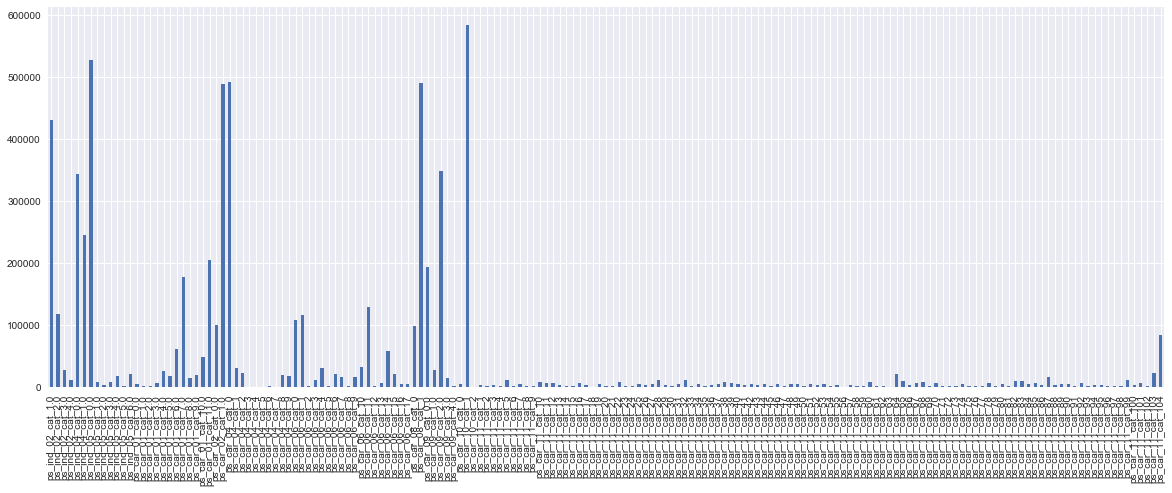

In [22]:
cate_trans.sum().plot(kind = 'bar')

In [23]:
cate_trans.head()

,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
for i in cate_trans.columns:
    if i[-4:] == '_1.0' or i[-2:] == '_1':
        print(i)

ps_ind_02_cat_1.0
ps_ind_04_cat_1.0
ps_ind_05_cat_1.0
ps_car_01_cat_1.0
ps_car_02_cat_1.0
ps_car_04_cat_1
ps_car_06_cat_1
ps_car_08_cat_1
ps_car_09_cat_1.0
ps_car_10_cat_1
ps_car_11_cat_1


In [25]:
for i in cate_trans.columns:
    if i[-4:] == '_1.0' or i[-2:] == '_1':
        cate_trans.drop([i], axis = 1, inplace= True)
cate_trans.head()

,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_05_cat_0.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,ps_ind_05_cat_4.0,ps_ind_05_cat_5.0,ps_ind_05_cat_6.0,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train[bin_col].describe()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000
mean,0.393312,0.256932,0.164152,0.185604,0.000370,0.001637,0.009242,0.000919,0.660914,0.120844,0.153614,0.122449,0.627847,0.554257,0.287159,0.349104,0.153249
std,0.488486,0.436942,0.370413,0.388787,0.019239,0.040432,0.095689,0.030300,0.473399,0.325946,0.360578,0.327804,0.483379,0.497048,0.452437,0.476687,0.360227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
X_train[conti_col].describe()

,id,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,5.887360e+05,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,...,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000,588736.000000
mean,7.437891e+05,1.909341,4.463573,0.012168,7.305298,0.610281,0.437928,2.345275,0.380108,0.813585,...,1.885754,7.689564,3.005649,9.225881,2.338721,8.432904,5.441232,1.441785,2.872507,7.539096
std,4.293866e+05,1.985067,2.680587,0.126000,3.553138,0.287780,0.403325,0.832110,0.058274,0.224449,...,1.134834,1.334268,1.414438,1.459728,1.246835,2.904314,2.332713,1.203102,1.694738,2.746645
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.250619,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719885e+05,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,2.000000,0.316228,0.671144,...,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,7.434865e+05,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,3.000000,0.374166,0.766202,...,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,1.115537e+06,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,3.000000,0.400000,0.906542,...,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,1.488027e+06,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,3.000000,1.264911,3.720626,...,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


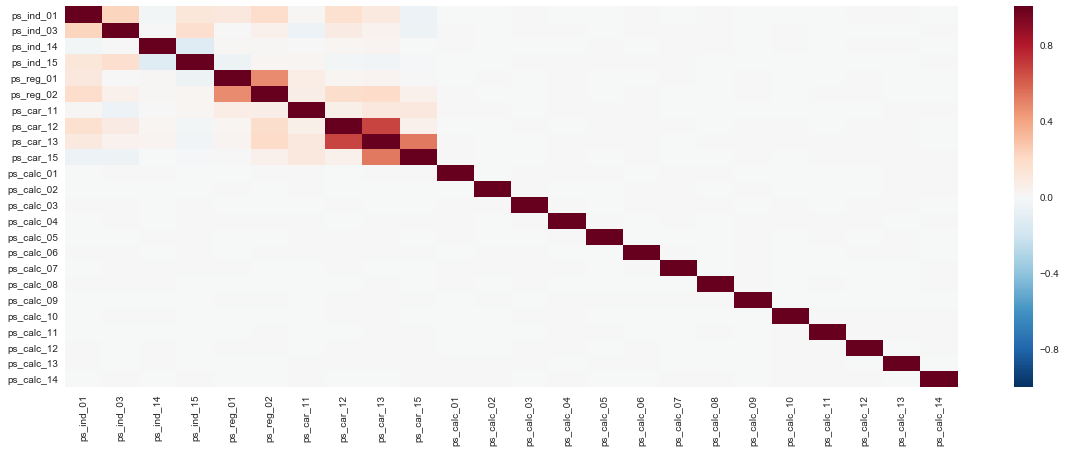

In [28]:
sns.heatmap(X_train[conti_col].drop(['id'], axis=1).corr())

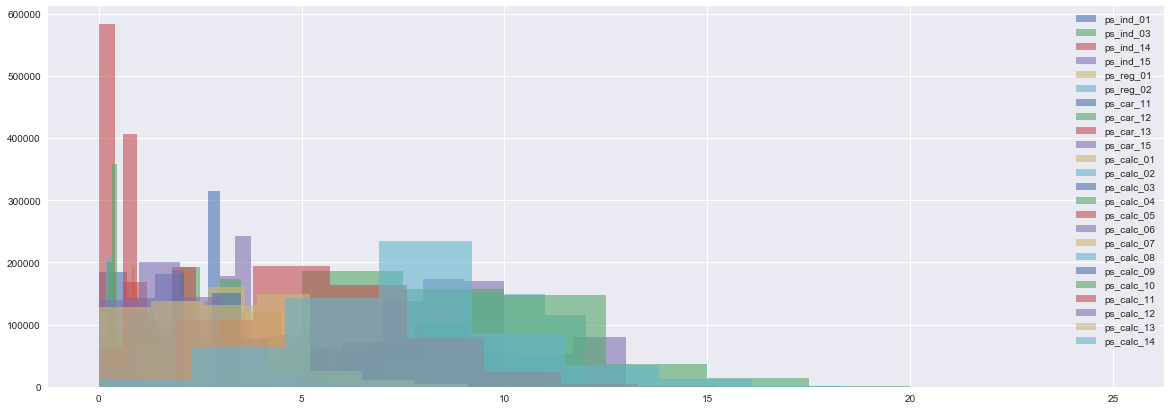

In [29]:
for i in X_train[conti_col].drop(['id'], axis=1).columns:
    plt.hist(X_train[i].dropna(), label = i, alpha = 0.6)
    plt.legend()    

In [30]:
final = pd.concat([X_train[conti_col].drop(['id'], axis=1), X_train[bin_col], cate_trans], axis = 1)
final.head()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_11,ps_car_12,ps_car_13,ps_car_15,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,2,5,0,11,0.7,0.2,2.0,0.400000,0.883679,3.605551,...,0,0,0,0,0,0,0,0,0,0
1,1,7,0,3,0.8,0.4,3.0,0.316228,0.618817,2.449490,...,0,0,0,0,0,0,0,0,0,0
2,5,9,0,12,0.0,0.0,1.0,0.316228,0.641586,3.316625,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,8,0.9,0.2,1.0,0.374166,0.542949,2.000000,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,9,0.7,0.6,3.0,0.316070,0.565832,2.000000,...,0,0,0,0,0,0,0,0,0,0


In [31]:
result = pd.concat([final, y_train], axis=1, join='inner')

In [32]:
y_train = result.target
X_train = result.drop(['target'], axis = 1)

In [33]:
y_train.sum()

21172

In [56]:
b.sum()

0

In [47]:
yes = X_train[y_train == 0].sample(n=21172)
b = pd.concat([yes,y_train], axis = 1, join = 'inner')['target']

In [57]:
z = pd.concat([b,pd.concat([X_train[y_train == 1],y_train], axis = 1, join = 'inner')['target']], axis = 0)

In [52]:
yes.count()

ps_ind_01            21172
ps_ind_03            21172
ps_ind_14            21172
ps_ind_15            21172
ps_reg_01            21172
ps_reg_02            21172
ps_car_11            21172
ps_car_12            21172
ps_car_13            21172
ps_car_15            21172
ps_calc_01           21172
ps_calc_02           21172
ps_calc_03           21172
ps_calc_04           21172
ps_calc_05           21172
ps_calc_06           21172
ps_calc_07           21172
ps_calc_08           21172
ps_calc_09           21172
ps_calc_10           21172
ps_calc_11           21172
ps_calc_12           21172
ps_calc_13           21172
ps_calc_14           21172
ps_ind_06_bin        21172
ps_ind_07_bin        21172
ps_ind_08_bin        21172
ps_ind_09_bin        21172
ps_ind_10_bin        21172
ps_ind_11_bin        21172
                     ...  
ps_car_11_cat_75     21172
ps_car_11_cat_76     21172
ps_car_11_cat_77     21172
ps_car_11_cat_78     21172
ps_car_11_cat_79     21172
ps_car_11_cat_80     21172
p

In [58]:
X = pd.concat([yes, X_train[y_train == 1]], axis = 0)

In [34]:
X_tr, X_test, y_tr, y_test = model_selection.train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train)

In [35]:
clf = linear_model.SGDClassifier(loss = 'log', penalty= 'l2',alpha = 0.1, l1_ratio = 0)

In [36]:
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0, learning_rate='optimal',
       loss='log', n_iter=5, n_jobs=1, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [31]:
clf.predict(X_train).sum()

0

In [37]:
ann = MLPClassifier(hidden_layer_sizes=(40,50,20), solver = 'sgd', max_iter=10000)

In [59]:
ann.fit(X, z)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 50, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [61]:
ann.predict(X).sum()/y_train.sum()

0.86808048365766111

In [32]:
import tensorflow as tf

In [37]:
feature_columns = [tf.feature_column.numeric_column("x", shape=[210])]
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                          hidden_units=[60,40,30,40],
                                          n_classes=2,
                                          optimizer=tf.train.ProximalAdagradOptimizer(
                                          learning_rate=0.00001,
                                          l2_regularization_strength = 0.7),
                                          model_dir="/tmp/Brazil_car_16")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/Brazil_car_16', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [38]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": np.array(X_tr)},
      y=np.array(y_tr),
      num_epochs=None,
      shuffle=True)

In [ ]:
classifier.train(input_fn=train_input_fn, steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/Brazil_car_16\model.ckpt.
INFO:tensorflow:loss = 22.5931, step = 1
INFO:tensorflow:global_step/sec: 151.087
INFO:tensorflow:loss = 24.36, step = 101 (0.667 sec)
INFO:tensorflow:global_step/sec: 162.823
INFO:tensorflow:loss = 29.0112, step = 201 (0.613 sec)
INFO:tensorflow:global_step/sec: 159.282
INFO:tensorflow:loss = 27.6013, step = 301 (0.634 sec)
INFO:tensorflow:global_step/sec: 156.636
INFO:tensorflow:loss = 28.4471, step = 401 (0.631 sec)
INFO:tensorflow:global_step/sec: 155.176
INFO:tensorflow:loss = 33.7988, step = 501 (0.650 sec)
INFO:tensorflow:global_step/sec: 158.877
INFO:tensorflow:loss = 29.722, step = 601 (0.623 sec)
INFO:tensorflow:global_step/sec: 185.75
INFO:tensorflow:loss = 29.0393, step = 701 (0.538 sec)
INFO:tensorflow:global_step/sec: 199.071
INFO:tensorflow:loss = 33.0127, step = 801 (0.501 sec)
INFO:tensorflow:global_step/sec: 213.078
INFO:tensorflow:loss = 27.4128, s

INFO:tensorflow:loss = 14.9086, step = 8401 (0.294 sec)
INFO:tensorflow:global_step/sec: 304.676
INFO:tensorflow:loss = 18.8988, step = 8501 (0.327 sec)
INFO:tensorflow:global_step/sec: 346.992
INFO:tensorflow:loss = 21.7517, step = 8601 (0.283 sec)
INFO:tensorflow:global_step/sec: 348.2
INFO:tensorflow:loss = 15.762, step = 8701 (0.287 sec)
INFO:tensorflow:global_step/sec: 372.886
INFO:tensorflow:loss = 27.8898, step = 8801 (0.268 sec)
INFO:tensorflow:global_step/sec: 350.644
INFO:tensorflow:loss = 24.4192, step = 8901 (0.287 sec)
INFO:tensorflow:global_step/sec: 309.392
INFO:tensorflow:loss = 20.9865, step = 9001 (0.325 sec)
INFO:tensorflow:global_step/sec: 300.101
INFO:tensorflow:loss = 23.0718, step = 9101 (0.333 sec)
INFO:tensorflow:global_step/sec: 309.392
INFO:tensorflow:loss = 18.2831, step = 9201 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.676
INFO:tensorflow:loss = 25.4026, step = 9301 (0.327 sec)


In [ ]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": np.array(X_test)},
      y=np.array(y_test),
      num_epochs=1,
      shuffle=False)

In [ ]:
accuracy_score = classifier.evaluate(input_fn=test_input_fn)

In [62]:
test_set = pd.read_csv('test.csv')

In [63]:
test_set = test_set.applymap(lambda x: np.nan if x==-1 else x)

In [64]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892509 non-null float64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892671 non-null float64
ps_ind_05_cat     884106 non-null float64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         731132 non-null float

In [72]:
test_set = test_set.drop(b, axis = 1)

In [73]:
test_set.fillna(method='ffill', inplace = True)

In [74]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 53 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null float64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null float64
ps_ind_05_cat     892816 non-null float64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_car_01_cat     892816 non-null float

In [75]:
categorical_test = test_set[cat_col]

for i in categorical_test.columns:
    categorical_test[i].astype('category')

cate_trans_test = pd.get_dummies(categorical_test, columns = names, prefix =names)
cate_trans_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Columns: 169 entries, ps_ind_02_cat_1.0 to ps_car_11_cat_104
dtypes: uint8(169)
memory usage: 143.9 MB


In [76]:
for i in cate_trans_test.columns:
    if i[-4:] == '_1.0' or i[-2:] == '_1':
        cate_trans_test.drop([i], axis = 1, inplace= True)
cate_trans_test.head()

,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_05_cat_0.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,ps_ind_05_cat_4.0,ps_ind_05_cat_5.0,ps_ind_05_cat_6.0,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
final_result = ann.predict_proba(final_test)

In [91]:
ann.predict(final_test).sum()

316559

In [103]:
hahahah = final_result[:,1].reshape(892816,1)

In [99]:
type(final_result)

numpy.ndarray

In [77]:
final_test = pd.concat([test_set[conti_col].drop(['id'], axis=1), test_set[bin_col], cate_trans_test], axis = 1)

In [ ]:
final_test.info()

In [ ]:
 predict_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": np.array(final_test)},
      num_epochs=1,
      shuffle=False)

In [ ]:
predictions = list(classifier.predict(input_fn=predict_input_fn))

In [ ]:
predicted_probablity = np.array([p["logistic"] for p in predictions])

In [86]:
submit_id = np.array(test_set['id']).reshape(test_set.shape[0],1)

In [112]:
submit_id

array([[      0],
       [      1],
       [      2],
       ..., 
       [1488024],
       [1488025],
       [1488026]], dtype=int64)

In [ ]:
predicted_probablity.shape

In [114]:
submit = pd.DataFrame(np.hstack((submit_id,hahahah)), columns=['id', 'target'])

In [116]:
submit.to_csv('submit.csv', index = False)